<a href="https://colab.research.google.com/github/Coderpo5/AppDevelopmentTasks/blob/main/EquinoxPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycbc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 5.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 31.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.1/43.1 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 44.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements

In [ ]:
import pycbc

/usr/local/lib/python3.10/dist-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


In [ ]:
data = pycbc.types.timeseries.load_timeseries('/content/GW150914_strain_data_final.txt')

In [ ]:
def get_sample_times(data):
        """Return an Array containing the sample times.
        """
        if data._epoch is None:
            return Array(range(len(data))) * data._delta_t
        else:
            return Array(range(len(data))) * data._delta_t + float(data._epoch)
        sample_times = property(get_sample_times,
                            doc="/content/GW150914_strain_data_final.txt")

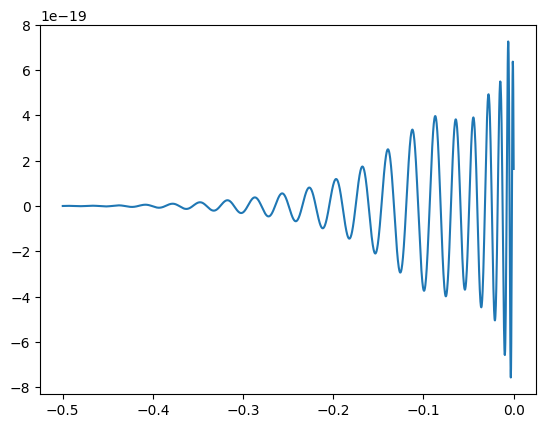

In [ ]:
def plot(data, **kwds):
        """ Basic plot of this time series
        """
        from matplotlib import pyplot

        if data.kind == 'real':
            plot = pyplot.plot(data.sample_times, data, **kwds)
            return plot
        elif data.kind == 'complex':
            plot1 = pyplot.plot(data.sample_times, data.real(), **kwds)
            plot2 = pyplot.plot(data.sample_times, data.imag(), **kwds)
            return plot1, plot2

plot(data)

In [ ]:
import matplotlib.pyplot as pp
from pycbc.waveform import get_td_waveform


for apx in ['/content/GW150914_strain_data_final.txt', 'IMRPhenomD']:
    hp, hc = get_td_waveform(approximant=apx,
                                 mass1=10,
                                 mass2=10,
                                 spin1z=0.9,
                                 delta_t=1.0/4096,
                                 f_lower=40)

    pp.plot(hp.sample_times, hp, label=apx)

pp.ylabel('Strain')
pp.xlabel('Time (s)')
pp.legend()
pp.show()

ValueError: Approximant /content/GW150914_strain_data_final.txt not available